In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
features = pd.read_csv('x_train.csv.gz')
features['memFreq'] = features.memFreq.replace('None', np.nan).astype(np.float64)
features['memtRFC'] = features.memtRFC.replace('None', np.nan).astype(np.float64)

In [3]:
target = pd.read_csv('y_train.csv', squeeze=True)

In [8]:
null_cnt = features.isnull().sum(axis=0)
null_cnt[null_cnt > 0]

memFreq     531
memtRFC    3148
dtype: int64

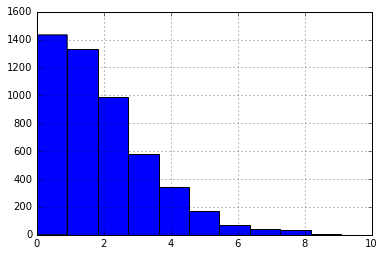

In [50]:
np.log2(target).hist(bins=10)

In [44]:
features.select_dtypes(include=[object])[:3]

,memType,os,cpuFull,cpuArch
0,DDR3-SDRAM PC3-12800,Windows 7 Professional Professional Media Cent...,Intel(R) Core(TM) i7-3820 CPU @ 3.60GHz,Sandy Bridge-E
1,DDR3-SDRAM PC3-12800,Windows 7 Professional Professional Media Cent...,Intel(R) Core(TM) i7-3820 CPU @ 3.60GHz,Sandy Bridge-E
2,DDR3-SDRAM PC3-12800,Windows 7 Professional Professional Media Cent...,Intel(R) Core(TM) i7-3820 CPU @ 3.60GHz,Sandy Bridge-E


In [6]:
features_test = pd.read_csv('x_test.csv.gz')
features_test['memFreq'] = features_test.memFreq.replace('None', np.nan).astype(np.float64)
features_test['memtRFC'] = features_test.memtRFC.replace('None', np.nan).astype(np.float64)

In [7]:
features.select_dtypes(include=[object])[:3]

,memType,os,cpuFull,cpuArch
0,DDR3-SDRAM PC3-12800,Windows 7 Professional Professional Media Cent...,Intel(R) Core(TM) i7-3820 CPU @ 3.60GHz,Sandy Bridge-E
1,DDR3-SDRAM PC3-12800,Windows 7 Professional Professional Media Cent...,Intel(R) Core(TM) i7-3820 CPU @ 3.60GHz,Sandy Bridge-E
2,DDR3-SDRAM PC3-12800,Windows 7 Professional Professional Media Cent...,Intel(R) Core(TM) i7-3820 CPU @ 3.60GHz,Sandy Bridge-E


In [8]:
features.os.value_counts()

Windows 7 Ultimate Professional Media Center 6.01.7601 Service Pack 1 (64-bit)        631
Microsoft Windows XP Professional 5.01.2600 Service Pack 3 (32-bit)                   478
Windows 7 Home Basic Home Edition 6.01.7601 Service Pack 1 (64-bit)                   465
Windows 7 Professional Professional Media Center 6.01.7601 Service Pack 1 (32-bit)    437
Windows 7 Professional Professional Media Center 6.01.7601 Service Pack 1 (64-bit)    421
Windows 8.1 Single Language Home Edition 6.02.9200 (64-bit)                           421
Windows 7 Ultimate Professional Media Center 6.01.7601 Service Pack 1 (32-bit)        297
Windows 8.1 Pro Professional 6.02.9200 (64-bit)                                       182
Windows 7 Starter Home Edition Starter 6.01.7601 Service Pack 1 (32-bit)              163
Windows 7 Home Premium Home Edition Media Center 6.01.7601 Service Pack 1 (64-bit)    137
Windows 8 Pro Professional 6.02.9200 (64-bit)                                         128
Windows 8 

In [7]:
features_num = features.drop(['memType', 'os', 'cpuFull', 'cpuArch'], axis=1)

In [7]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer, StandardScaler

pca = PCA(n_components=10)
pl = make_pipeline(Imputer(), StandardScaler(), pca)

comp = pl.fit_transform(features_num)

In [8]:
pca.explained_variance_ratio_[:5]

array([ 0.76172421,  0.06451842,  0.04046725,  0.02217316,  0.01802537])

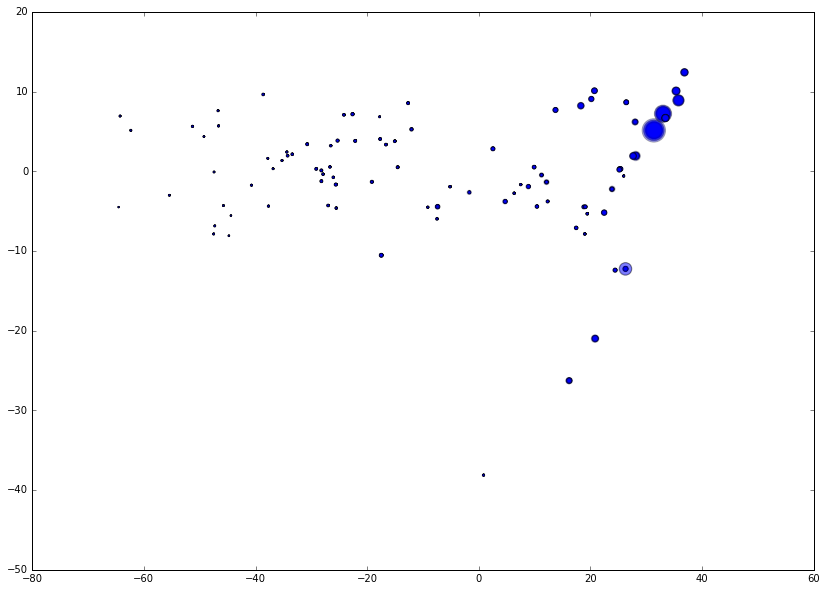

In [9]:
plt.figure(figsize=(14,10))
plt.scatter(comp.T[0], comp.T[1], s=target, alpha=.3)
plt.show()

In [11]:
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer, StandardScaler

tsne = TSNE(n_components=2, init='pca')
pl = make_pipeline(Imputer(), StandardScaler(), tsne)

comp = pl.fit_transform(features_num)

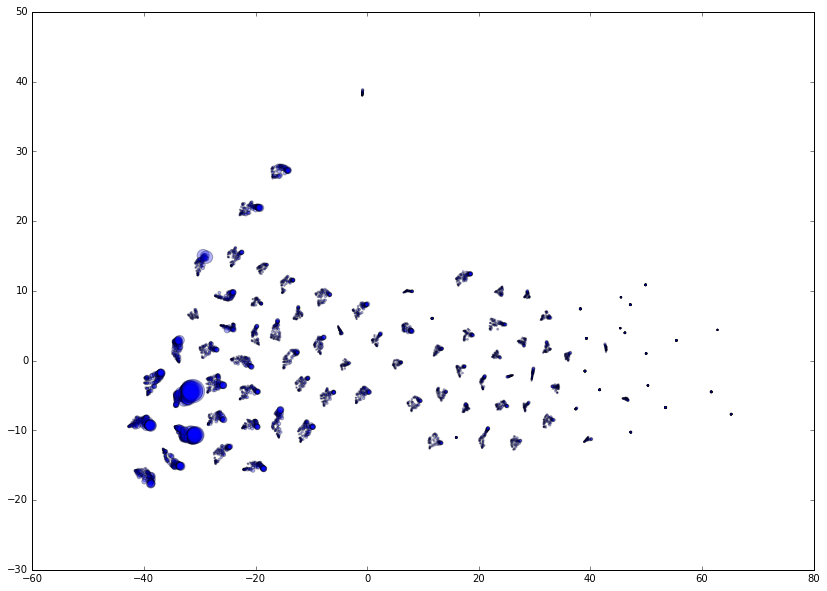

In [12]:
plt.figure(figsize=(14,10))
plt.scatter(comp.T[0], comp.T[1], s=target, alpha=.3)
plt.show()

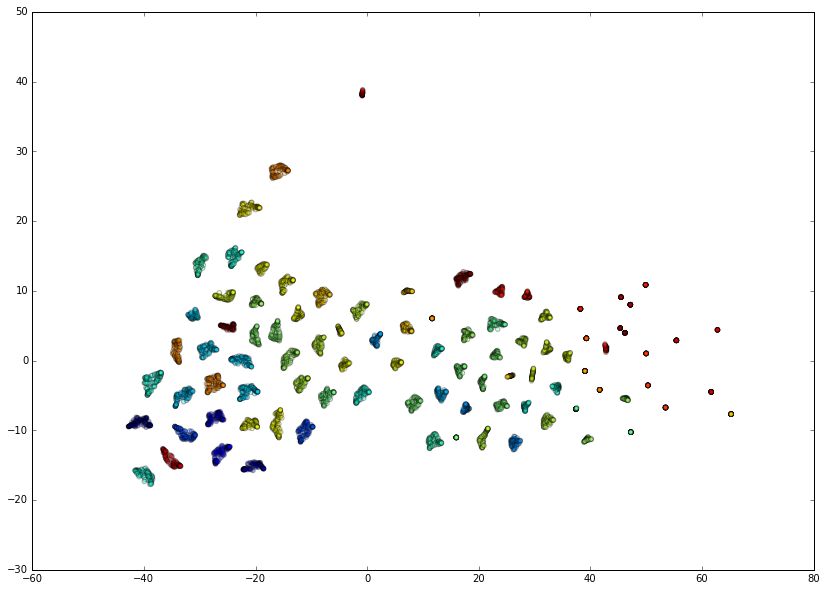

In [15]:
plt.figure(figsize=(14,10))
plt.scatter(comp.T[0], comp.T[1], c=features.cpuFreq, alpha=.3)
plt.show()

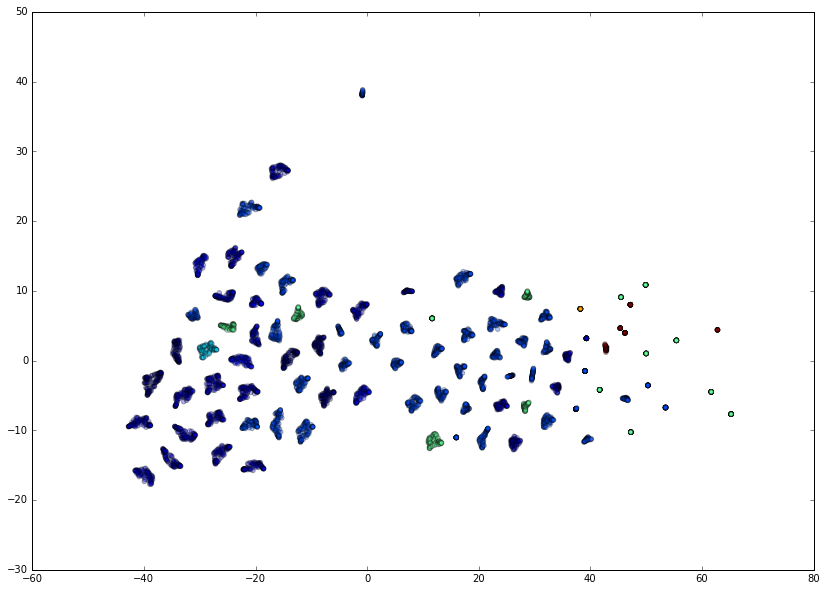

In [16]:
plt.figure(figsize=(14,10))
plt.scatter(comp.T[0], comp.T[1], c=features.memSize_MB, alpha=.3)
plt.show()

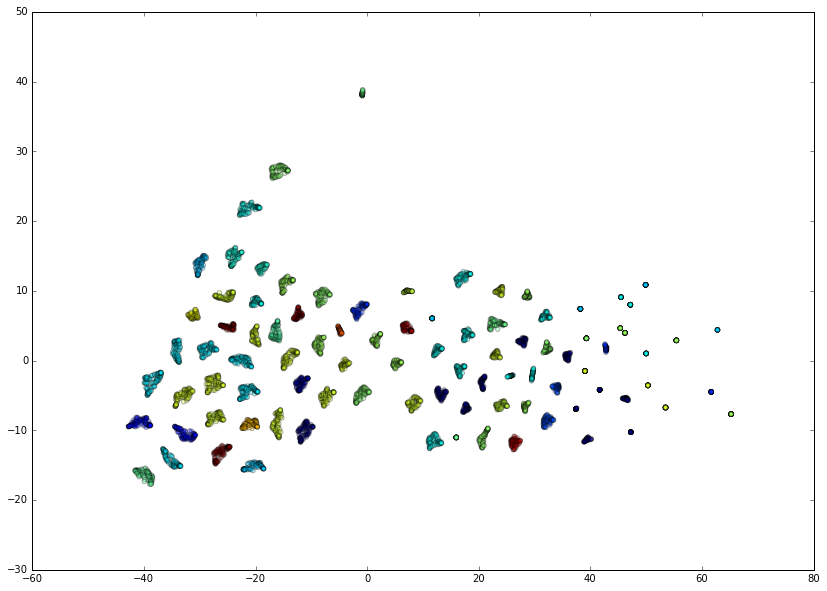

In [20]:
plt.figure(figsize=(14,10))
plt.scatter(comp.T[0], comp.T[1], c=features.os.map(hash), alpha=.3)
plt.show()

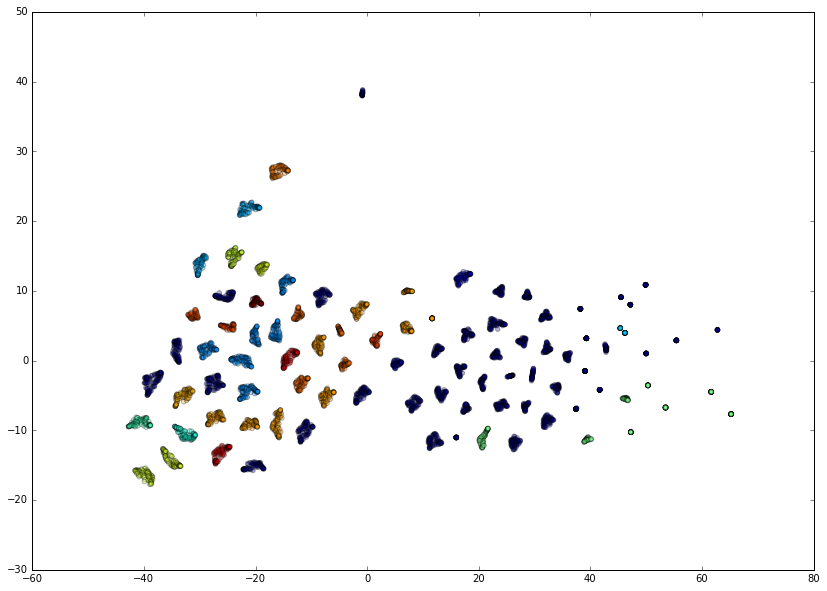

In [21]:
plt.figure(figsize=(14,10))
plt.scatter(comp.T[0], comp.T[1], c=features.cpuArch.map(hash), alpha=.3)
plt.show()

In [7]:
pd.get_dummies(features.cpuArch)[:3].T

,0,1,2
Arrandale,0.0,0.0,0.0
Bloomfield,0.0,0.0,0.0
Bobcat,0.0,0.0,0.0
Brisbane,0.0,0.0,0.0
Clarskfield,0.0,0.0,0.0
Clovertown,0.0,0.0,0.0
Conroe,0.0,0.0,0.0
Haswell,0.0,0.0,0.0
Irwindale,0.0,0.0,0.0
Italy,0.0,0.0,0.0


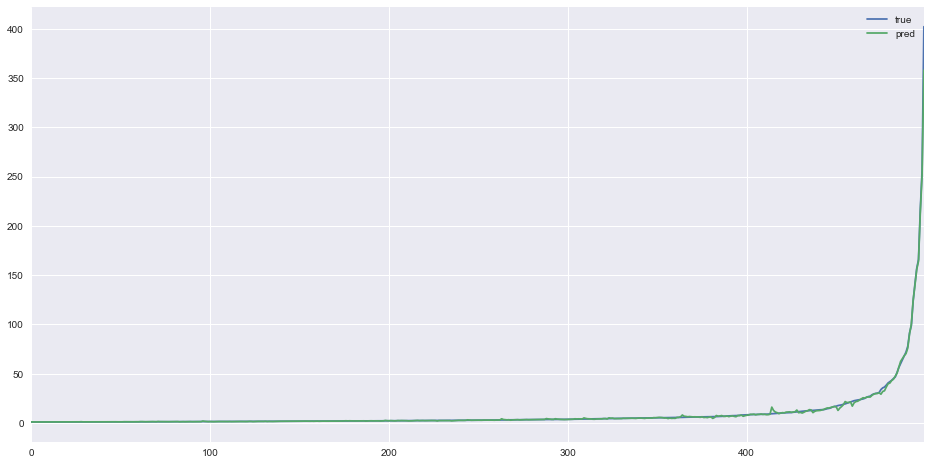

In [8]:
pt = pd.read_csv('est4_8-results.csv', sep='\t')
pt.sort_values('true').reset_index()[['true', 'pred']].ewm(1).mean().plot(figsize=(16, 8))

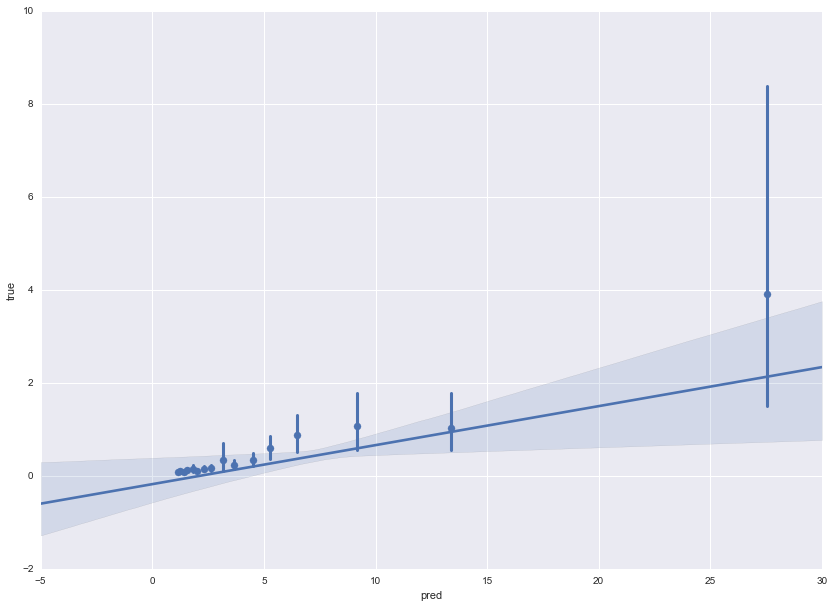

In [8]:
pt = pd.read_csv('est4_8-results.csv', sep='\t')
plt.figure(figsize=(14, 10))
sns.regplot(pt.pred, (pt.pred - pt.true).abs().rename('true'), x_bins=16)

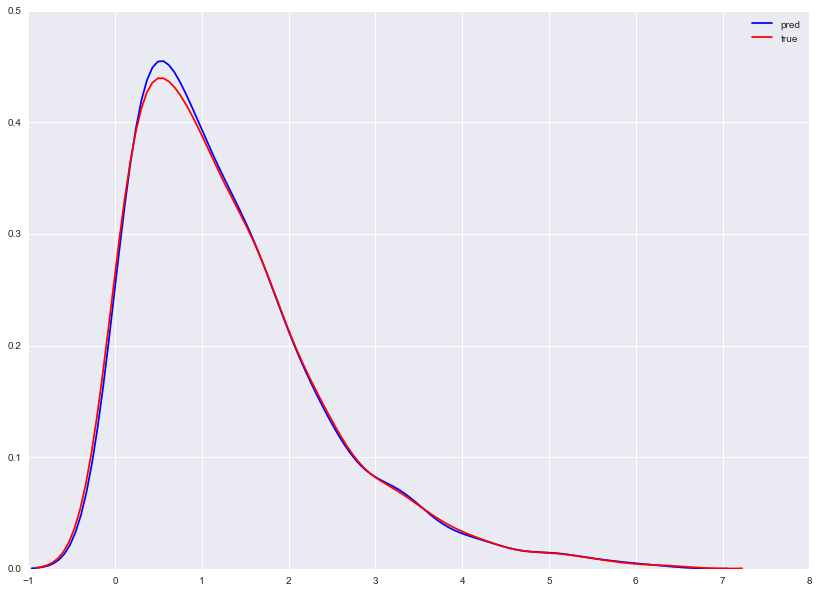

In [15]:
pt = pd.read_csv('est4_8-results.csv', sep='\t')
plt.figure(figsize=(14, 10))
sns.kdeplot(np.log(pt.pred), color='blue')
sns.kdeplot(np.log(pt.true), color='red')